In [ ]:
Training Taylor

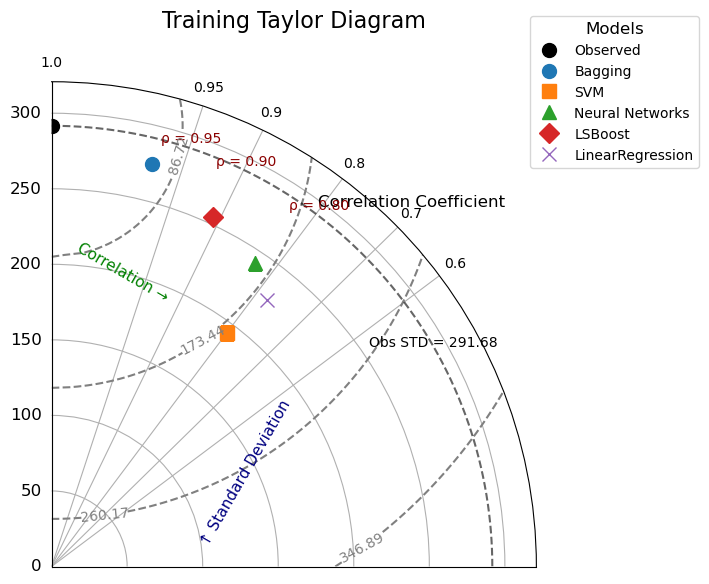

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class TaylorDiagram:
    def __init__(self, csv_file, markers=None, marker_size=10):
        self.csv_file = csv_file
        self.markers = markers or ['o', 's', '^', 'D', 'x', '*', 'p', 'h']
        self.marker_size = marker_size
        self.observed, self.models = self.load_data()
        self.std_dev_obs = np.std(self.observed)
        self.correlations = {
            model: np.corrcoef(self.observed, prediction)[0, 1]
            for model, prediction in self.models.items()
        }
        self.std_devs = {
            model: np.std(prediction)
            for model, prediction in self.models.items()
        }

    def load_data(self):
        df = pd.read_csv(self.csv_file)
        df.head()
        observed = df.iloc[:, 0].values
        models = {col: df[col].values for col in df.columns[1:]}
        return observed, models

    def plot(self):
        fig = plt.figure(figsize=(8, 6), dpi=100)
        ax = fig.add_subplot(111, polar=True)
        plt.rcParams.update({'font.size': 12})

        # Plot the observed point
        ax.plot(0, self.std_dev_obs, 'ko', label='Observed', markersize=self.marker_size)

        # Plot each model
        for i, (model, prediction) in enumerate(self.models.items()):
            corr = self.correlations[model]
            std = self.std_devs[model]
            angle = np.arccos(corr)
            marker = self.markers[i % len(self.markers)]
            ax.plot(angle, std, marker, label=model, markersize=self.marker_size)

        # Customize correlation axis
        corr_ticks = np.array([1.0, 0.95, 0.9, 0.8, 0.7, 0.6])
        ax.set_xticks(np.arccos(corr_ticks))
        ax.set_xticklabels([str(c) for c in corr_ticks])
        ax.set_thetamin(0)
        ax.set_thetamax(90)
        ax.set_theta_direction(-1)
        ax.set_theta_zero_location("N")
        ax.set_title('Training Taylor Diagram', pad=20, fontsize=16)

        # Customize radius (standard deviation)
        max_std = max(max(self.std_devs.values()), self.std_dev_obs) * 1.1
        ax.set_ylim(0, max_std)

        # Plot RMSD contours
        corr_grid, std_grid = np.meshgrid(np.linspace(0, 1, 200), np.linspace(0, max_std, 200))
        rmsd = np.sqrt(
            self.std_dev_obs**2 + std_grid**2 - 2 * self.std_dev_obs * std_grid * corr_grid
        )
        rms_contours = ax.contour(
            np.arccos(corr_grid), std_grid, rmsd,
            levels=np.linspace(0, np.max(rmsd), 6),
            colors='gray', linestyles='dashed'
        )
        ax.clabel(rms_contours, inline=True, fontsize=10, fmt='%.2f')

        # Observed STD line (dashed circle)
        theta = np.linspace(0, np.pi/2, 300)
        ax.plot(theta, np.full_like(theta, self.std_dev_obs), 'k--', alpha=0.6)

        # Label observed STD circle
        ax.text(np.radians(60), self.std_dev_obs + 0.01, f'Obs STD = {self.std_dev_obs:.2f}',
                ha='center', fontsize=10, color='black')

        # Add axis labels
        ax.text(np.radians(45), max_std * 1.05, 'Correlation Coefficient',
                fontsize=12, ha='center', color='black')
        ax.text(np.radians(5), max_std * 0.55, 'Correlation →',
                fontsize=11, color='green', rotation=-30)
        ax.text(np.radians(85), max_std * 0.5, '↑ Standard Deviation',
                fontsize=11, color='navy', rotation=60, ha='right')

        # Add multiple correlation arc labels
        for corr_val in [0.95, 0.9, 0.8]:
            theta = np.arccos(corr_val)
            radius = max_std * 0.92
            ax.text(theta, radius, f'ρ = {corr_val:.2f}',
                    fontsize=10, color='darkred', ha='center')

        # Add legend
        ax.legend(loc='upper right', bbox_to_anchor=(1.35, 1.15), fontsize=10, title='Models')
        plt.tight_layout()
        plt.savefig('Taylor_Diagram_training.png', dpi=300, bbox_inches='tight')
        plt.show()



if __name__ == "__main__":
    results_file = r'E:\isccp_hgg_data\train_predictions_comparison.csv'
    taylor_diagram = TaylorDiagram(results_file)
    taylor_diagram.plot()
    plt.rcParams.update({
    'font.size': 14,           # Increase overall font size
    'font.weight': 'bold',     # Make all fonts bold
    'axes.labelweight': 'bold',
    'axes.titlesize': 16,
    'axes.titleweight': 'bold',
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
    })

# Save the plot as a PNG file
plt.savefig(r'E:\isccp_hgg_data\train_taylor_diagram.png', dpi=300, bbox_inches='tight')
plt.close()  


In [ ]:
Testing Taylor

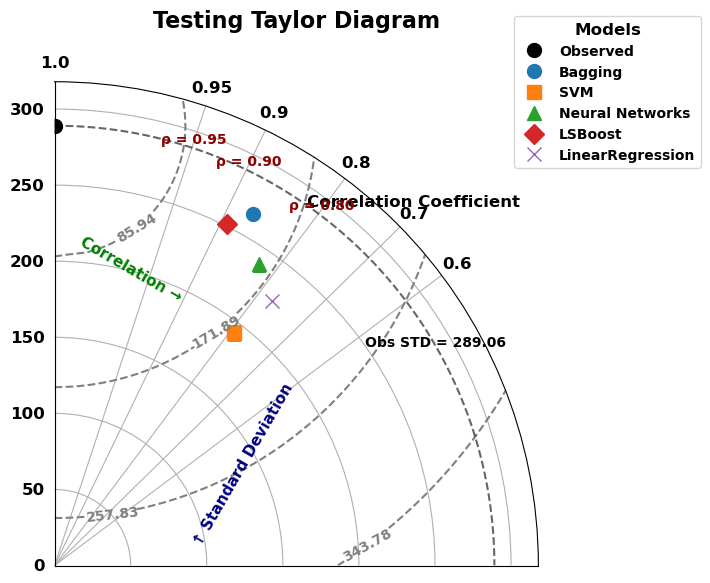

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class TaylorDiagram:
    def __init__(self, csv_file, markers=None, marker_size=10):
        self.csv_file = csv_file
        self.markers = markers or ['o', 's', '^', 'D', 'x', '*', 'p', 'h']
        self.marker_size = marker_size
        self.observed, self.models = self.load_data()
        self.std_dev_obs = np.std(self.observed)
        self.correlations = {
            model: np.corrcoef(self.observed, prediction)[0, 1]
            for model, prediction in self.models.items()
        }
        self.std_devs = {
            model: np.std(prediction)
            for model, prediction in self.models.items()
        }

    def load_data(self):
        df = pd.read_csv(self.csv_file)
        df.head()
        observed = df.iloc[:, 0].values
        models = {col: df[col].values for col in df.columns[1:]}
        return observed, models

    def plot(self):
        fig = plt.figure(figsize=(8, 6), dpi=100)
        ax = fig.add_subplot(111, polar=True)
        plt.rcParams.update({'font.size': 12})

        # Plot the observed point
        ax.plot(0, self.std_dev_obs, 'ko', label='Observed', markersize=self.marker_size)

        # Plot each model
        for i, (model, prediction) in enumerate(self.models.items()):
            corr = self.correlations[model]
            std = self.std_devs[model]
            angle = np.arccos(corr)
            marker = self.markers[i % len(self.markers)]
            ax.plot(angle, std, marker, label=model, markersize=self.marker_size)

        # Customize correlation axis
        corr_ticks = np.array([1.0, 0.95, 0.9, 0.8, 0.7, 0.6])
        ax.set_xticks(np.arccos(corr_ticks))
        ax.set_xticklabels([str(c) for c in corr_ticks])
        ax.set_thetamin(0)
        ax.set_thetamax(90)
        ax.set_theta_direction(-1)
        ax.set_theta_zero_location("N")
        ax.set_title('Testing Taylor Diagram', pad=20, fontsize=16)

        # Customize radius (standard deviation)
        max_std = max(max(self.std_devs.values()), self.std_dev_obs) * 1.1
        ax.set_ylim(0, max_std)

        # Plot RMSD contours
        corr_grid, std_grid = np.meshgrid(np.linspace(0, 1, 200), np.linspace(0, max_std, 200))
        rmsd = np.sqrt(
            self.std_dev_obs**2 + std_grid**2 - 2 * self.std_dev_obs * std_grid * corr_grid
        )
        rms_contours = ax.contour(
            np.arccos(corr_grid), std_grid, rmsd,
            levels=np.linspace(0, np.max(rmsd), 6),
            colors='gray', linestyles='dashed'
        )
        ax.clabel(rms_contours, inline=True, fontsize=10, fmt='%.2f')

        # Observed STD line (dashed circle)
        theta = np.linspace(0, np.pi/2, 300)
        ax.plot(theta, np.full_like(theta, self.std_dev_obs), 'k--', alpha=0.6)

        # Label observed STD circle
        ax.text(np.radians(60), self.std_dev_obs + 0.01, f'Obs STD = {self.std_dev_obs:.2f}',
                ha='center', fontsize=10, color='black')

        # Add axis labels
        ax.text(np.radians(45), max_std * 1.05, 'Correlation Coefficient',
                fontsize=12, ha='center', color='black')
        ax.text(np.radians(5), max_std * 0.55, 'Correlation →',
                fontsize=11, color='green', rotation=-30)
        ax.text(np.radians(85), max_std * 0.5, '↑ Standard Deviation',
                fontsize=11, color='navy', rotation=60, ha='right')

        # Add multiple correlation arc labels
        for corr_val in [0.95, 0.9, 0.8]:
            theta = np.arccos(corr_val)
            radius = max_std * 0.92
            ax.text(theta, radius, f'ρ = {corr_val:.2f}',
                    fontsize=10, color='darkred', ha='center')

        # Add legend
        ax.legend(loc='upper right', bbox_to_anchor=(1.35, 1.15), fontsize=10, title='Models')
        plt.tight_layout()
        plt.savefig('Taylor_Diagram_testing.png', dpi=300, bbox_inches='tight')
        plt.show()



if __name__ == "__main__":
    results_file = r'E:\isccp_hgg_data\test_predictions_comparison.csv'
    taylor_diagram = TaylorDiagram(results_file)
    taylor_diagram.plot()
    plt.rcParams.update({
    'font.size': 14,           # Increase overall font size
    'font.weight': 'bold',     # Make all fonts bold
    'axes.labelweight': 'bold',
    'axes.titlesize': 16,
    'axes.titleweight': 'bold',
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
    })
    

# Save the plot as a PNG file
plt.savefig(r'E:\isccp_hgg_data\test_taylor_diagram.png', dpi=300, bbox_inches='tight')
plt.close()  


In [ ]:
Dataset values on ytrain for training the taylor

In [7]:
# Taylor_training Create a DataFrame
results_df = pd.DataFrame({
    'Observed': ytrain,
    'Bagging': ypred_train_bag,
    'SVM': ypred_train_svm,
    'Neural Networks': ypred_train_nn,
    'LSBoost': ypred_train_lsboost,
    'LinearRegression': ypred_train_lr
})

# Save to CSV
results_df.to_csv('train_predictions_comparison.csv', index=False)

NameError: name 'ytrain' is not defined

In [ ]:
Dataset values on ytest for testing the taylor

In [126]:
# Taylor_testing Create a DataFrame
results_df = pd.DataFrame({
    'Observed': ytest,
    'Bagging': ypred_test_bag,
    'SVM': ypred_test_svm,
    'Neural Networks': ypred_test_nn,
    'LSBoost': ypred_test_lsboost,
    'LinearRegression': ypred_test_lr
})
# Save to CSV
results_df.to_csv('test_predictions_comparison.csv', index=False)

In [ ]:
Loading ISSCP data, extracting some variables and calculating sinmonth, cosmonth

In [9]:
import os
import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime, timedelta
import traceback

# Buoy coordinates
buoy_lon = 90
buoy_lat = 15

# Define time range and time intervals
start_date = datetime(2013, 1, 1, 0, 0, 0)
end_date = datetime(2013, 4, 5, 12, 0, 0)
time_intervals = [0, 3, 6, 9, 12, 15, 18, 21]  # hours

# File directory
base_dir = r"C:\Users\manda\isccp_hgg_data"

# Initialize data list and counters
records = []
file_found_count = 0
file_success_count = 0

print("** Reminder: Make sure to install 'netcdf4' or 'h5netcdf' packages for xarray to read .nc files. **")
print("You can install via pip: pip install netcdf4")
print("Or via conda: conda install -c conda-forge netcdf4")
print()

# Loop over each day
current_date = start_date
while current_date <= end_date:
    for hour in time_intervals:
        year_val = current_date.year
        month_val = current_date.month
        day_val = current_date.day
        hour_str = f"{hour:02d}"

        # Build full path to file
        file_name = os.path.join(
            base_dir,
            f'ISCCP.HGG.v01r00.GLOBAL.{year_val:04d}.{month_val:02d}.{day_val:02d}.{hour_str}00.GPC.10KM.CS00.EQ1.00.nc'
        )

        if os.path.isfile(file_name):
            file_found_count += 1
            print(f'Processing file: {file_name}')
            try:
                ds = xr.open_dataset(file_name)

                # Required variables in your data
                required_vars = ['eqlon', 'eqlat', 'mu0', 'n_total', 'n_cloudy']
                if not all(var in ds.variables for var in required_vars):
                    print(f"Missing required variables in file: {file_name}")
                    print("Available variables:", list(ds.variables))
                    ds.close()
                    continue

                # Load variables
                eqlon = ds['eqlon'].values  # shape (eqcell,)
                eqlat = ds['eqlat'].values  # shape (eqcell,)
                mu0 = ds['mu0'].values      # shape (eqcell,)
                n_total = ds['n_total'].values  # shape (eqcell,)
                n_cloudy = ds['n_cloudy'].values  # shape (eqcell,)

                # Calculate distances from buoy to each eqcell
                distances = np.sqrt((eqlon - buoy_lon)**2 + (eqlat - buoy_lat)**2)
                idx = np.argmin(distances)

                # Calculate cloud fraction scaled 0-8
                if n_total[idx] == 0:
                    cloud_amount = np.nan
                else:
                    cloud_amount = (n_cloudy[idx] / n_total[idx]) * 8

                mu0_value = mu0[idx]

                # Append record
                records.append({
                    'Year': year_val,
                    'Month': month_val,
                    'Day': day_val,
                    'Hour': hour,
                    'CloudAmount': cloud_amount,
                    'Mu0': mu0_value
                })

                file_success_count += 1

            except Exception:
                print(f'Error processing file: {file_name}')
                traceback.print_exc()
            finally:
                try:
                    ds.close()
                except:
                    pass
        else:
            print(f'File not found: {file_name}')
    current_date += timedelta(days=1)

# Convert to DataFrame
final_data = pd.DataFrame.from_records(records)

# Add SinMonth and CosMonth if there's any data
if not final_data.empty:
    final_data['SinMonth'] = np.sin(np.radians(final_data['Month'] * (360 / 24)))
    final_data['CosMonth'] = np.cos(np.radians(final_data['Month'] * (360 / 24)))

# Summary and output
print(f"\nTotal files found: {file_found_count}")
print(f"Total files successfully processed: {file_success_count}")
print(f"Total records collected: {len(final_data)}")

print("\nAll records:")
print(final_data.to_string(index=False))

# Save to CSV
final_data.to_csv("debug_output.csv", index=False)
print("Saved data to debug_output.csv")


** Reminder: Make sure to install 'netcdf4' or 'h5netcdf' packages for xarray to read .nc files. **
You can install via pip: pip install netcdf4
Or via conda: conda install -c conda-forge netcdf4

Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.01.0000.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.01.0300.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.01.0600.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.01.0900.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.01.1200.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.01.1500.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.01.1800.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.01.23.0600.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '4d9163ce-c7ae-48a3-8cae-183ac2b0e18d']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_24768\4039211555.py", line 49, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray

Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.23.1500.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.23.1800.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.23.2100.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.0000.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.0300.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.0600.GPC.10KM.CS00.EQ1.00.nc
Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.0600.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.0900.GPC.10KM.CS00.EQ1.00.nc


Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.0600.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '2b9bc82b-ed1b-450c-a640-ebba070166d0']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_24768\4039211555.py", line 49, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray

Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.1200.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.1500.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.1800.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.2100.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.25.0000.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.25.0300.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.25.0600.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.25.0900.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.25.1200.GPC.10KM.CS00.EQ1.00.nc
P

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.01.26.0000.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '7811c3eb-0421-424d-8164-ecbeb103b72f']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_24768\4039211555.py", line 49, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray

Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.26.1500.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.26.1800.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.26.2100.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.27.0000.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.27.0300.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.27.0600.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.27.0900.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.27.1200.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.27.1500.GPC.10KM.CS00.EQ1.00.nc
P

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.02.02.1500.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '33ca19bb-ea8c-44a1-afef-97af1dada2ac']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_24768\4039211555.py", line 49, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray

Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.03.0600.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.03.0900.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.03.1200.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.03.1500.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.03.1800.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.03.2100.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.04.0000.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.04.0300.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.04.0600.GPC.10KM.CS00.EQ1.00.nc
P

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.02.14.0000.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '030416b1-b825-4395-81c2-69b954cf3d6f']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_24768\4039211555.py", line 49, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray

Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.14.0900.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.14.1200.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.14.1500.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.14.1800.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.14.2100.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.15.0000.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.15.0300.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.15.0600.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.15.0900.GPC.10KM.CS00.EQ1.00.nc
P

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.03.04.0900.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), 'a767c997-2203-4fa0-9c6c-2eb3bb48b344']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_24768\4039211555.py", line 49, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray

Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.04.1800.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.04.2100.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.05.0000.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.05.0300.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.05.0600.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.05.0900.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.05.1200.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.05.1500.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.05.1800.GPC.10KM.CS00.EQ1.00.nc
P

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.03.08.2100.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), 'ef667cfc-35c8-45ab-8c28-6aee05752cca']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_24768\4039211555.py", line 49, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray

Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.09.0300.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.09.0600.GPC.10KM.CS00.EQ1.00.nc
Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.09.0600.GPC.10KM.CS00.EQ1.00.nc
File not found: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.09.0900.GPC.10KM.CS00.EQ1.00.nc
File not found: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.09.1200.GPC.10KM.CS00.EQ1.00.nc
File not found: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.09.1500.GPC.10KM.CS00.EQ1.00.nc
File not found: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.09.1800.GPC.10KM.CS00.EQ1.00.nc
File not found: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.09.2100.GPC.10KM.CS00.EQ1.00.nc
File not found: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.10.0000.GPC.10KM.CS00.EQ1.00.nc
F

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.03.09.0600.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), 'cb2cb1cf-6725-428c-a3af-1ac8c30d6c90']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_24768\4039211555.py", line 49, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray

Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.13.0000.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.13.0300.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.13.0600.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.13.0900.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.13.1200.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.13.1500.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.13.1800.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.13.2100.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.14.0000.GPC.10KM.CS00.EQ1.00.nc
P

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.0000.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '3eb935cf-910e-430a-a6fb-fbdbf24a7532']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_24768\4039211555.py", line 49, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray

Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.0900.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.1200.GPC.10KM.CS00.EQ1.00.nc
Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.1200.GPC.10KM.CS00.EQ1.00.nc
File not found: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.1500.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.1800.GPC.10KM.CS00.EQ1.00.nc
Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.1800.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.2100.GPC.10KM.CS00.EQ1.00.nc


Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.1200.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), 'ad2ff157-364c-49de-bad6-65e0e2a3332a']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_24768\4039211555.py", line 49, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray

Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.0000.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.0300.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.0600.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.0900.GPC.10KM.CS00.EQ1.00.nc
Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.0900.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.1200.GPC.10KM.CS00.EQ1.00.nc


Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.0900.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '66cf19d8-4460-490b-ba11-33e24ef17cb1']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_24768\4039211555.py", line 49, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray

Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.1500.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.1800.GPC.10KM.CS00.EQ1.00.nc
Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.1800.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.2100.GPC.10KM.CS00.EQ1.00.nc


Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.1800.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), 'e65aa019-8268-46bb-8216-2d2dbded6b8c']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_24768\4039211555.py", line 49, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray

Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.2100.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.19.0000.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.19.0300.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.19.0600.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.19.0900.GPC.10KM.CS00.EQ1.00.nc
Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.19.0900.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.19.1200.GPC.10KM.CS00.EQ1.00.nc
Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.19.1200.GPC.10KM.CS00.EQ1.00.nc
File not found: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.19.1500.GPC.10KM

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.03.19.0900.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), 'c8f37b2c-f51f-458b-b822-a5c78a3472b3']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_24768\4039211555.py", line 49, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray

Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.20.0000.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.20.0300.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.20.0600.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.20.0900.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.20.1200.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.20.1500.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.20.1800.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.20.2100.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.21.0000.GPC.10KM.CS00.EQ1.00.nc
P

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.04.02.2100.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '5eee6581-fb89-4fef-bc87-68b7d72d8601']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_24768\4039211555.py", line 49, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray

Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.03.0900.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.03.1200.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.03.1500.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.03.1800.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.03.2100.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.04.0000.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.04.0300.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.04.0600.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.04.0900.GPC.10KM.CS00.EQ1.00.nc
E

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.04.04.0900.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '2c779533-d827-43a9-b6ac-3628d460a6ae']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_24768\4039211555.py", line 49, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray

Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.04.1800.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.04.2100.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.05.0000.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.05.0300.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.05.0600.GPC.10KM.CS00.EQ1.00.nc
Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.05.0600.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.05.0900.GPC.10KM.CS00.EQ1.00.nc
Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.05.0900.GPC.10KM.CS00.EQ1.00.nc
File not found: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.05.1200.GPC.10KM.CS00.

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.04.05.0600.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '921a6793-b84b-4e95-b4a4-699f5b6ac20e']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_24768\4039211555.py", line 49, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray

In [ ]:
Calculate ClouldAmount and replace NaN with -1 in mu0

In [3]:
import os
import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime, timedelta
import traceback

# Buoy coordinates
buoy_lon = 90
buoy_lat = 15

# Define time range and time intervals
start_date = datetime(2013, 1, 1, 0, 0, 0)
end_date = datetime(2013, 4, 5, 12, 0, 0)
time_intervals = [0, 3, 6, 9, 12, 15, 18, 21]  # hours

# File directory
base_dir = r"C:\Users\manda\isccp_hgg_data"

# Initialize data list and counters
records = []
file_found_count = 0
file_success_count = 0

print("** Reminder: Make sure to install 'netcdf4' or 'h5netcdf' packages for xarray to read .nc files. **")
print("You can install via pip: pip install netcdf4")
print("Or via conda: conda install -c conda-forge netcdf4")
print()

# Loop over each day
current_date = start_date
while current_date <= end_date:
    for hour in time_intervals:
        year_val = current_date.year
        month_val = current_date.month
        day_val = current_date.day
        hour_str = f"{hour:02d}"

        # Build full path to file
        file_name = os.path.join(
            base_dir,
            f'ISCCP.HGG.v01r00.GLOBAL.{year_val:04d}.{month_val:02d}.{day_val:02d}.{hour_str}00.GPC.10KM.CS00.EQ1.00.nc'
        )

        if os.path.isfile(file_name):
            file_found_count += 1
            print(f'Processing file: {file_name}')
            try:
                ds = xr.open_dataset(file_name)

                # Required variables in your data
                required_vars = ['eqlon', 'eqlat', 'mu0', 'n_total', 'n_cloudy']
                if not all(var in ds.variables for var in required_vars):
                    print(f"Missing required variables in file: {file_name}")
                    print("Available variables:", list(ds.variables))
                    ds.close()
                    continue

                # Load variables
                eqlon = ds['eqlon'].values
                eqlat = ds['eqlat'].values
                mu0 = ds['mu0'].values
                n_total = ds['n_total'].values
                n_cloudy = ds['n_cloudy'].values

                # Calculate distances from buoy to each eqcell
                distances = np.sqrt((eqlon - buoy_lon)**2 + (eqlat - buoy_lat)**2)
                idx = np.argmin(distances)

                # Calculate cloud fraction scaled 0-8
                if n_total[idx] == 0:
                    cloud_amount = np.nan
                else:
                    cloud_amount = (n_cloudy[idx] / n_total[idx]) * 8

                mu0_value = mu0[idx]

                # Append record
                records.append({
                    'Year': year_val,
                    'Month': month_val,
                    'Day': day_val,
                    'Hour': hour,
                    'CloudAmount': cloud_amount,
                    'Mu0': mu0_value
                })

                file_success_count += 1

            except Exception:
                print(f'Error processing file: {file_name}')
                traceback.print_exc()
            finally:
                try:
                    ds.close()
                except:
                    pass
        else:
            print(f'File not found: {file_name}')
    current_date += timedelta(days=1)

# Convert to DataFrame
final_data = pd.DataFrame.from_records(records)

# Handle NaNs: Replace all NaNs with -1 before any further processing
final_data.fillna(-1, inplace=True)

# Add SinMonth and CosMonth if there's any data
if not final_data.empty:
    final_data['SinMonth'] = np.sin(np.radians(final_data['Month'] * (360 / 24)))
    final_data['CosMonth'] = np.cos(np.radians(final_data['Month'] * (360 / 24)))

# Summary and output
print(f"\nTotal files found: {file_found_count}")
print(f"Total files successfully processed: {file_success_count}")
print(f"Total records collected: {len(final_data)}")

print("\nAll records (head):")
print(final_data.head(20).to_string(index=False))


** Reminder: Make sure to install 'netcdf4' or 'h5netcdf' packages for xarray to read .nc files. **
You can install via pip: pip install netcdf4
Or via conda: conda install -c conda-forge netcdf4

Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.01.0000.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.01.0300.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.01.0600.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.01.0900.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.01.1200.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.01.1500.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.01.1800.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.01.23.0600.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '46ab3163-f093-43b2-8fdb-e0e2b1144439']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_12828\47188371.py", line 49, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\b

Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.23.1500.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.23.1800.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.23.2100.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.0000.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.0300.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.0600.GPC.10KM.CS00.EQ1.00.nc
Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.0600.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.0900.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.1200.GPC.10KM.CS00.EQ1.0

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.0600.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), 'd145ea5d-94fb-47d2-b9b7-598fe418793b']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_12828\47188371.py", line 49, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\b

Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.1500.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.1800.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.2100.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.25.0000.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.25.0300.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.25.0600.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.25.0900.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.25.1200.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.25.1500.GPC.10KM.CS00.EQ1.00.nc
P

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.01.26.0000.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '902e796a-b4db-4509-bf88-4b767bf4c7fa']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_12828\47188371.py", line 49, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\b

Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.26.1500.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.26.1800.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.26.2100.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.27.0000.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.27.0300.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.27.0600.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.27.0900.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.27.1200.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.27.1500.GPC.10KM.CS00.EQ1.00.nc
P

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.02.02.1500.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '89ae0c74-ae8d-41a6-8f7a-4e3c872abba9']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_12828\47188371.py", line 49, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\b

Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.03.0600.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.03.0900.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.03.1200.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.03.1500.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.03.1800.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.03.2100.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.04.0000.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.04.0300.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.04.0600.GPC.10KM.CS00.EQ1.00.nc
P

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.02.14.0000.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '5579863a-5243-48df-8dbd-fcf0c1ae1ea3']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_12828\47188371.py", line 49, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\b

Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.14.1200.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.14.1500.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.14.1800.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.14.2100.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.15.0000.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.15.0300.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.15.0600.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.15.0900.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.15.1200.GPC.10KM.CS00.EQ1.00.nc
P

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.03.04.0900.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), 'd9c29599-edc5-4e60-87c3-37f684e50902']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_12828\47188371.py", line 49, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\b

Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.04.1500.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.04.1800.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.04.2100.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.05.0000.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.05.0300.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.05.0600.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.05.0900.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.05.1200.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.05.1500.GPC.10KM.CS00.EQ1.00.nc
P

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.03.08.2100.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), 'ebbbcac9-0c44-42d3-9cf4-fa408f0eab84']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_12828\47188371.py", line 49, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\b

Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.09.0600.GPC.10KM.CS00.EQ1.00.nc
Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.09.0600.GPC.10KM.CS00.EQ1.00.nc
File not found: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.09.0900.GPC.10KM.CS00.EQ1.00.nc
File not found: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.09.1200.GPC.10KM.CS00.EQ1.00.nc
File not found: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.09.1500.GPC.10KM.CS00.EQ1.00.nc
File not found: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.09.1800.GPC.10KM.CS00.EQ1.00.nc
File not found: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.09.2100.GPC.10KM.CS00.EQ1.00.nc
File not found: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.10.0000.GPC.10KM.CS00.EQ1.00.nc
File not found: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.10.0300.GPC.10KM.CS00.EQ1.00.nc
Fi

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.0000.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), 'a958bb9a-aae5-4283-b2ff-2f52acdeaca4']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_12828\47188371.py", line 49, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\b

Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.0900.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.1200.GPC.10KM.CS00.EQ1.00.nc
Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.1200.GPC.10KM.CS00.EQ1.00.nc
File not found: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.1500.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.1800.GPC.10KM.CS00.EQ1.00.nc
Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.1800.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.2100.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.0000.GPC.10KM.CS00.EQ1.00.nc


Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.1200.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), 'b4c4903e-24db-45fc-b6db-7a607642a1b5']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_12828\47188371.py", line 49, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\b

Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.0300.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.0600.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.0900.GPC.10KM.CS00.EQ1.00.nc
Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.0900.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.1200.GPC.10KM.CS00.EQ1.00.nc


Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.0900.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '474167af-0736-40a9-a05f-25d53cfd550d']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_12828\47188371.py", line 49, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\b

Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.1500.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.1800.GPC.10KM.CS00.EQ1.00.nc
Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.1800.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.2100.GPC.10KM.CS00.EQ1.00.nc
Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.2100.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.19.0000.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.19.0300.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.19.0600.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.19.0900.GPC.10KM.CS00

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.03.19.0900.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), 'f456561f-dafb-44f2-973b-97bb954b4567']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_12828\47188371.py", line 49, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\b

Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.20.0300.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.20.0600.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.20.0900.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.20.1200.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.20.1500.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.20.1800.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.20.2100.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.21.0000.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.21.0300.GPC.10KM.CS00.EQ1.00.nc
P

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.04.02.2100.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), 'aacdc8d8-8342-4d9c-af97-b29349e70238']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_12828\47188371.py", line 49, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\b

Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.03.0900.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.03.1200.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.03.1500.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.03.1800.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.03.2100.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.04.0000.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.04.0300.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.04.0600.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.04.0900.GPC.10KM.CS00.EQ1.00.nc
E

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.04.04.0900.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '8b336bc0-abf6-4b81-a16a-e32fa7554913']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_12828\47188371.py", line 49, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\b

Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.04.1500.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.04.1800.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.04.2100.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.05.0000.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.05.0300.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.05.0600.GPC.10KM.CS00.EQ1.00.nc
Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.05.0600.GPC.10KM.CS00.EQ1.00.nc
Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.05.0900.GPC.10KM.CS00.EQ1.00.nc
Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.05.0900.GPC.10KM.CS00

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.04.05.0600.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), 'bab92cd5-172a-4f01-b893-5d2cff3bf59b']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_12828\47188371.py", line 49, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\b

In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime, timedelta
import traceback

# Buoy coordinates
buoy_lon = 90
buoy_lat = 15

# Time range and time intervals
start_date = datetime(2013, 1, 1, 0, 0, 0)
end_date = datetime(2013, 4, 5, 12, 0, 0)
time_intervals = [0, 3, 6, 9, 12, 15, 18, 21]  # hours

# File directory
base_dir = r"C:\Users\manda\isccp_hgg_data"

# Initialize records and counters
records = []
file_found_count = 0
file_success_count = 0

print("** Reminder: Ensure 'netcdf4' or 'h5netcdf' is installed for xarray to read .nc files. **")
print("Install via pip: pip install netcdf4")
print("Or via conda: conda install -c conda-forge netcdf4")
print()

# Loop over each date and hour
current_date = start_date
while current_date <= end_date:
    for hour in time_intervals:
        year_val = current_date.year
        month_val = current_date.month
        day_val = current_date.day
        hour_str = f"{hour:02d}"

        file_name = os.path.join(
            base_dir,
            f'ISCCP.HGG.v01r00.GLOBAL.{year_val:04d}.{month_val:02d}.{day_val:02d}.{hour_str}00.GPC.10KM.CS00.EQ1.00.nc'
        )

        if os.path.isfile(file_name):
            file_found_count += 1
            print(f' Processing file: {file_name}')
            try:
                ds = xr.open_dataset(file_name)

                required_vars = ['eqlon', 'eqlat', 'mu0', 'n_total', 'n_cloudy']
                if not all(var in ds.variables for var in required_vars):
                    print(f" Missing required variables in: {file_name}")
                    print("Available variables:", list(ds.variables))
                    ds.close()
                    continue

                eqlon = ds['eqlon'].values
                eqlat = ds['eqlat'].values
                mu0 = ds['mu0'].values
                n_total = ds['n_total'].values
                n_cloudy = ds['n_cloudy'].values

                distances = np.sqrt((eqlon - buoy_lon) ** 2 + (eqlat - buoy_lat) ** 2)
                idx = np.argmin(distances)

                cloud_amount = (n_cloudy[idx] / n_total[idx]) * 8 if n_total[idx] != 0 else np.nan
                mu0_value = mu0[idx]

                records.append({
                    'Year': year_val,
                    'Month': month_val,
                    'Day': day_val,
                    'Hour': hour,
                    'CloudAmount': cloud_amount,
                    'Mu0': mu0_value
                })

                file_success_count += 1

            except Exception:
                print(f' Error processing file: {file_name}')
                traceback.print_exc()
            finally:
                try:
                    ds.close()
                except:
                    pass
        else:
            print(f' File not found: {file_name}')
    current_date += timedelta(days=1)

# Convert to DataFrame
df = pd.DataFrame.from_records(records)

if df.empty:
    print(" No cloud data processed.")
else:
    # Replace NaNs with -1
    df.fillna(-1, inplace=True)

    # Add SinMonth and CosMonth
    df['SinMonth'] = np.sin(np.radians(df['Month'] * (360 / 24)))
    df['CosMonth'] = np.cos(np.radians(df['Month'] * (360 / 24)))

    print(f"\n Total files found: {file_found_count}")
    print(f" Total files successfully processed: {file_success_count}")
    print(f" Total records collected: {len(df)}")

    print("\n Processed Cloud Data (All Records):\n")
    print(df.to_string(index=False))



new=xr.open_dataset(r"E:\isccp_hgg_data\rad15n90e_2m.cdf")
new

** Reminder: Ensure 'netcdf4' or 'h5netcdf' is installed for xarray to read .nc files. **
Install via pip: pip install netcdf4
Or via conda: conda install -c conda-forge netcdf4

 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.01.0000.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.01.0300.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.01.0600.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.01.0900.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.01.1200.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.01.1500.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.01.1800.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\iscc

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.01.23.0600.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), 'c73807e5-2478-404f-ad9b-7d8695bed8c3']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_10296\3006967764.py", line 48, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray

 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.23.1200.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.23.1500.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.23.1800.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.23.2100.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.0000.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.0300.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.0600.GPC.10KM.CS00.EQ1.00.nc
 Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.0600.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.0900.GPC.10KM.C

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.0600.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), 'a5a70e05-4aad-40a7-87d8-5fc95489c449']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_10296\3006967764.py", line 48, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray

 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.1500.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.1800.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.2100.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.25.0000.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.25.0300.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.25.0600.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.25.0900.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.25.1200.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.25.1500.GPC.10KM.CS00.EQ

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.01.26.0000.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), 'd1aff7d4-e325-430d-ad96-9a6669ec4b94']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_10296\3006967764.py", line 48, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray

 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.26.1500.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.26.1800.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.26.2100.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.27.0000.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.27.0300.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.27.0600.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.27.0900.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.27.1200.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.27.1500.GPC.10KM.CS00.EQ

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.02.02.1500.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '5a705f10-e92b-4ec6-a1a3-e25f5f2e3a7d']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_10296\3006967764.py", line 48, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray

 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.03.1200.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.03.1500.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.03.1800.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.03.2100.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.04.0000.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.04.0300.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.04.0600.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.04.0900.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.04.1200.GPC.10KM.CS00.EQ

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.02.14.0000.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '710b3596-84b7-4389-a733-e5ae4bf08237']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_10296\3006967764.py", line 48, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray

 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.14.0600.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.14.0900.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.14.1200.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.14.1500.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.14.1800.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.14.2100.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.15.0000.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.15.0300.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.15.0600.GPC.10KM.CS00.EQ

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.03.04.0900.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '95ae664e-a389-4d7a-aa39-4871bf25f7e9']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_10296\3006967764.py", line 48, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray

 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.04.1800.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.04.2100.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.05.0000.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.05.0300.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.05.0600.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.05.0900.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.05.1200.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.05.1500.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.05.1800.GPC.10KM.CS00.EQ

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.03.08.2100.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), 'bcd52375-b7b8-47eb-9307-4a2d89f2c712']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_10296\3006967764.py", line 48, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray

 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.09.0600.GPC.10KM.CS00.EQ1.00.nc
 Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.09.0600.GPC.10KM.CS00.EQ1.00.nc
 File not found: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.09.0900.GPC.10KM.CS00.EQ1.00.nc
 File not found: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.09.1200.GPC.10KM.CS00.EQ1.00.nc
 File not found: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.09.1500.GPC.10KM.CS00.EQ1.00.nc
 File not found: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.09.1800.GPC.10KM.CS00.EQ1.00.nc
 File not found: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.09.2100.GPC.10KM.CS00.EQ1.00.nc
 File not found: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.10.0000.GPC.10KM.CS00.EQ1.00.nc
 File not found: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.10.0300.GPC.10KM.CS00.EQ1

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.03.09.0600.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), 'd8787fd6-7035-490d-a73a-9e4ab5af0cab']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_10296\3006967764.py", line 48, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray

 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.13.0600.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.13.0900.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.13.1200.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.13.1500.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.13.1800.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.13.2100.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.14.0000.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.14.0300.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.14.0600.GPC.10KM.CS00.EQ

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.0000.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '0db09e43-cb9e-4e78-809f-18265a0a9091']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_10296\3006967764.py", line 48, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray

 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.0600.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.0900.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.1200.GPC.10KM.CS00.EQ1.00.nc
 Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.1200.GPC.10KM.CS00.EQ1.00.nc
 File not found: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.1500.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.1800.GPC.10KM.CS00.EQ1.00.nc
 Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.1800.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.2100.GPC.10KM.CS00.EQ1.00.nc


Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.1200.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), 'a16a1031-4dae-47f7-b38b-cd6f8aa25c47']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_10296\3006967764.py", line 48, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray

 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.0000.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.0300.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.0600.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.0900.GPC.10KM.CS00.EQ1.00.nc
 Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.0900.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.1200.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.1500.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.1800.GPC.10KM.CS00.EQ1.00.nc
 Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.1800.GPC.

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.0900.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '1eed15ec-dd42-4385-9203-e698bc198dae']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_10296\3006967764.py", line 48, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray

 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.19.0300.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.19.0600.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.19.0900.GPC.10KM.CS00.EQ1.00.nc
 Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.19.0900.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.19.1200.GPC.10KM.CS00.EQ1.00.nc
 Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.19.1200.GPC.10KM.CS00.EQ1.00.nc
 File not found: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.19.1500.GPC.10KM.CS00.EQ1.00.nc
 File not found: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.19.1800.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.19.2100.GPC.10

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.03.19.0900.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '2181f70c-646d-44bb-9fac-4bc3202a63b7']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_10296\3006967764.py", line 48, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray

 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.20.0000.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.20.0300.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.20.0600.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.20.0900.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.20.1200.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.20.1500.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.20.1800.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.20.2100.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.21.0000.GPC.10KM.CS00.EQ

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.04.02.2100.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '27817f67-4537-4256-99d4-006a4c56ce39']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_10296\3006967764.py", line 48, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray

 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.03.0900.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.03.1200.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.03.1500.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.03.1800.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.03.2100.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.04.0000.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.04.0300.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.04.0600.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.04.0900.GPC.10KM.CS00.EQ

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.04.04.0900.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), 'baf444e7-70b5-4362-8250-29bf2d90a8e7']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_10296\3006967764.py", line 48, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray

 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.04.1800.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.04.2100.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.05.0000.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.05.0300.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.05.0600.GPC.10KM.CS00.EQ1.00.nc
 Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.05.0600.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.05.0900.GPC.10KM.CS00.EQ1.00.nc
 Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.05.0900.GPC.10KM.CS00.EQ1.00.nc
 File not found: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.05.1200.GPC.1

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.04.05.0600.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '79f98a83-0e31-409b-99a3-6229d6315b9f']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_10296\3006967764.py", line 48, in <module>
    ds = xr.open_dataset(file_name)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray

<xarray.Dataset>
Dimensions:   (time: 1728885, depth: 1, lat: 1, lon: 1)
Coordinates:
  * time      (time) datetime64[ns] 2013-01-01 ... 2019-07-30T05:28:00
  * depth     (depth) float32 -3.5
  * lat       (lat) float32 15.0
  * lon       (lon) float32 90.0
Data variables:
    RD_495    (time, depth, lat, lon) float32 ...
    QSW_5495  (time, depth, lat, lon) float32 ...
    SSW_6495  (time, depth, lat, lon) float32 ...
    RDS_496   (time, depth, lat, lon) float32 ...
Attributes:
    platform_code:                15n90e
    site_code:                    15n90e
    wmo_platform_code:            23009
    array:                        RAMA
    Request_for_acknowledgement:  If you use these data in publications or pr...
    Data_Source:                  Global Tropical Moored Buoy Array Project O...
    File_info:                    Contact: Dai.C.McClurg@noaa.gov
    missing_value:                1e+35
    _FillValue:                   1e+35
    CREATION_DATE:                22:49 12-FEB-2025

In [ ]:
Read time, SWR from CDF file 

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime

# File path
cdf_file = r"E:\isccp_hgg_data\rad15n90e_2m.cdf"

try:
    ds = xr.open_dataset(cdf_file)

    # Read time and SWR variable
    time_vals = ds['time'].values
    swr_vals = ds['RD_495'].values  # shape: (time, depth, lat, lon)

    # Convert time to datetime (already datetime64[ns] in metadata)
    time_series = pd.to_datetime(time_vals)

    # Squeeze dimensions to 1D: (time,)
    swr_flat = swr_vals.squeeze()

    # Ensure length match
    if len(time_series) != len(swr_flat):
        print(f" Mismatch: time ({len(time_series)}), SWR ({len(swr_flat)})")
    else:
        print(f" Read {len(swr_flat)} SWR values")

        # 3-hour sampling from 2-min intervals: every 90th index
        idx = np.arange(0, len(time_series), 90)

        # Build DataFrame
        df_swr = pd.DataFrame({
            "Year": time_series[idx].year,
            "Month": time_series[idx].month,
            "Day": time_series[idx].day,
            "Hour": time_series[idx].hour,
            "SWR": swr_flat[idx]
        })

        # Display full DataFrame
        pd.set_option('display.max_rows', None)
        print("\n Final Processed SWR Data:")
        print(df_swr)

except Exception as e:
    print(f" Error loading .cdf file: {e}")


 Read 1728885 SWR values

 Final Processed SWR Data:
       Year  Month  Day  Hour          SWR
0      2013      1    1     0     0.000000
1      2013      1    1     3   481.910004
2      2013      1    1     6   852.729980
3      2013      1    1     9   462.709991
4      2013      1    1    12     0.000000
5      2013      1    1    15     0.000000
6      2013      1    1    18     0.000000
7      2013      1    1    21     0.000000
8      2013      1    2     0     0.000000
9      2013      1    2     3   424.299988
10     2013      1    2     6   804.469971
11     2013      1    2     9   370.619995
12     2013      1    2    12     0.000000
13     2013      1    2    15     0.000000
14     2013      1    2    18     0.000000
15     2013      1    2    21     0.000000
16     2013      1    3     0     0.000000
17     2013      1    3     3   438.089996
18     2013      1    3     6   813.330017
19     2013      1    3     9   527.219971
20     2013      1    3    12     0.000000
2

In [ ]:
load merged_data_swr_last file, train with ML models

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load data
file_path = r"E:\isccp_hgg_data\merged_data_swr_last.csv"
data = pd.read_csv(file_path)

# Remove rows with missing values
data.dropna(inplace=True)

# Add sine and cosine transformations for Day and Hour
data["SinDay"] = np.sin(2 * np.pi * data["Day"] / 365)
data["CosDay"] = np.cos(2 * np.pi * data["Day"] / 365)
data["SinHour"] = np.sin(2 * np.pi * data["Hour"] / 12)
data["CosHour"] = np.cos(2 * np.pi * data["Hour"] / 12)

# Select features
features = ["Year", "Month", "Day", "Hour", "SinDay", "CosDay", "SinHour", "CosHour", 
            "CloudAmount", "Mu0", "SinMonth", "CosMonth"]
X = data[features]
y = data["SWR"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Neural Network (same as MATLAB fitnet(27)) ---
nn_model = Sequential()
nn_model.add(Dense(27, activation='relu', input_shape=(X_train.shape[1],)))
nn_model.add(Dense(1))
nn_model.compile(optimizer='adam', loss='mse')
nn_model.fit(X_train, y_train, epochs=100, verbose=0)

y_pred_net = nn_model.predict(X_test).flatten()
mse_net = mean_squared_error(y_test, y_pred_net)
rmse_net = np.sqrt(mse_net)
r2_net = r2_score(y_test, y_pred_net)

# --- SVR ---
svm_model = SVR()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
r2_svm = r2_score(y_test, y_pred_svm)

# --- LSBoost (Gradient Boosting) ---
ensemble_model = GradientBoostingRegressor()
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
rmse_ensemble = np.sqrt(mse_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

# --- Bagging Ensemble ---
bag_model = BaggingRegressor(n_estimators=300)
bag_model.fit(X_train, y_train)
y_pred_bag = bag_model.predict(X_test)
mse_bag = mean_squared_error(y_test, y_pred_bag)
rmse_bag = np.sqrt(mse_bag)
r2_bag = r2_score(y_test, y_pred_bag)

# --- Regression Tree ---
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# --- Summary Table ---
results_table = pd.DataFrame({
    'Model': ['Neural Network', 'SVR', 'LSBoost', 'Regression Tree', 'Bagging'],
    'MSE': [mse_net, mse_svm, mse_ensemble, mse_tree, mse_bag],
    'RMSE': [rmse_net, rmse_svm, rmse_ensemble, rmse_tree, rmse_bag],
    'R_squared': [r2_net, r2_svm, r2_ensemble, r2_tree, r2_bag]
})

print(results_table)


C:\Users\manda\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
             Model           MSE        RMSE  R_squared
0   Neural Network  15811.792477  125.744950   0.853146
1              SVR  38514.173080  196.250282   0.642295
2          LSBoost  13875.455040  117.794121   0.871130
3  Regression Tree  25910.843580  160.968455   0.759350
4          Bagging  14750.760911  121.452711   0.863001


In [ ]:
Normalize the file data

In [3]:
import os
import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime, timedelta
import traceback

# ==================== STEP 1: PROCESS NETCDF FILES ==================== #

# Buoy coordinates
buoy_lon = 87.99
buoy_lat = 16.36

# Define time range and intervals
start_date = datetime(2013, 1, 1, 0, 0, 0)
end_date = datetime(2013, 4, 5, 12, 0, 0)
time_intervals = [0, 3, 6, 9, 12, 15, 18, 21]

# File directory
base_dir = r"C:\Users\manda\isccp_hgg_data"

# Initialize list for records
records = []

print("\n Reading NetCDF files from:", base_dir)

# Loop through date and times
current_date = start_date
while current_date <= end_date:
    for hour in time_intervals:
        year_val = current_date.year
        month_val = current_date.month
        day_val = current_date.day
        hour_val = hour

        file_name = f"ISCCP.HGG.v01r00.GLOBAL.{year_val:04d}.{month_val:02d}.{day_val:02d}.{hour_val:02d}00.GPC.10KM.CS00.EQ1.00.nc"
        file_path = os.path.join(base_dir, file_name)

        if os.path.isfile(file_path):
            print(f" Processing file: {file_path}")
            try:
                ds = xr.open_dataset(file_path)

                eqlon = ds['eqlon'].values
                eqlat = ds['eqlat'].values
                n_cloudy = ds['n_cloudy'].values
                n_total = ds['n_total'].values
                mu0 = ds['mu0'].values

                # Find closest grid cell
                distance = np.sqrt((eqlon - buoy_lon)**2 + (eqlat - buoy_lat)**2)
                idx = np.argmin(distance)

                # Extract values
                if n_total[idx] == 0:
                    cloud_amount = np.nan
                else:
                    cloud_amount = (n_cloudy[idx] / n_total[idx]) * 8

                mu0_value = mu0[idx]
                if np.isnan(mu0_value):
                    mu0_value = -1

                # Cyclic time components
                sin_month = np.sin(np.radians(month_val * (360 / 12)))
                cos_month = np.cos(np.radians(month_val * (360 / 12)))
                sin_day = np.sin(np.radians(day_val * (360 / 31)))
                cos_day = np.cos(np.radians(day_val * (360 / 31)))
                sin_hour = np.sin(np.radians(hour_val * (360 / 24)))
                cos_hour = np.cos(np.radians(hour_val * (360 / 24)))

                records.append({
                    'Year': year_val,
                    'Month': month_val,
                    'Day': day_val,
                    'Hour': hour_val,
                    'CloudAmount': cloud_amount,
                    'Mu0': mu0_value,
                    'SinMonth': sin_month,
                    'CosMonth': cos_month,
                    'SinDay': sin_day,
                    'CosDay': cos_day,
                    'SinHour': sin_hour,
                    'CosHour': cos_hour
                })

                ds.close()

            except Exception:
                print(f" Error processing file: {file_path}")
                traceback.print_exc()
        else:
            print(f"File not found: {file_path}")

    current_date += timedelta(days=1)

# ==================== STEP 2: NORMALIZATION ==================== #

if records:
    final_df = pd.DataFrame(records)

    # Replace NaNs with -1 before normalization
    final_df.fillna(-1, inplace=True)

    def normalize(series):
        valid = series[series != -1]
        if valid.empty:
            return pd.Series([-1] * len(series))
        min_val = valid.min()
        max_val = valid.max()
        norm = (series - min_val) / (max_val - min_val)
        norm[series == -1] = -1
        return norm

    final_df['CloudAmount'] = normalize(final_df['CloudAmount'])
    final_df['Mu0'] = normalize(final_df['Mu0'])

    # ==================== STEP 3: DISPLAY FINAL DATA ==================== #

    print("\n Final Normalized Data:")
    print(final_df.to_string(index=False))

else:
    print("\n No valid data processed.")



 Reading NetCDF files from: C:\Users\manda\isccp_hgg_data
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.01.0000.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.01.0300.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.01.0600.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.01.0900.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.01.1200.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.01.1500.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.01.1800.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.01.2100.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_da

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.01.23.0600.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), 'e38aec13-36fd-4927-86ca-196f2bdf9ef3']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_10296\688219374.py", line 42, in <module>
    ds = xr.open_dataset(file_path)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\

 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.23.1500.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.23.1800.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.23.2100.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.0000.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.0300.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.0600.GPC.10KM.CS00.EQ1.00.nc
 Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.0600.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.0900.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.1200.GPC.10KM.C

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.0600.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), 'cf50b9bf-f6eb-4ec0-80b1-6ba7a375e989']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_10296\688219374.py", line 42, in <module>
    ds = xr.open_dataset(file_path)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\

 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.1500.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.1800.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.24.2100.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.25.0000.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.25.0300.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.25.0600.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.25.0900.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.25.1200.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.25.1500.GPC.10KM.CS00.EQ

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.01.26.0000.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '27884e6f-e1ad-453d-b823-c896a673a7ef']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_10296\688219374.py", line 42, in <module>
    ds = xr.open_dataset(file_path)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\

 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.26.1200.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.26.1500.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.26.1800.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.26.2100.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.27.0000.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.27.0300.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.27.0600.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.27.0900.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.01.27.1200.GPC.10KM.CS00.EQ

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.02.02.1500.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '4eeeeadb-1f02-43ae-bded-c6f824c37539']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_10296\688219374.py", line 42, in <module>
    ds = xr.open_dataset(file_path)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\

 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.03.0900.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.03.1200.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.03.1500.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.03.1800.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.03.2100.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.04.0000.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.04.0300.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.04.0600.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.04.0900.GPC.10KM.CS00.EQ

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.02.14.0000.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '162b311e-94a5-4a6a-bf54-607bc87a4a0e']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_10296\688219374.py", line 42, in <module>
    ds = xr.open_dataset(file_path)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\

 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.14.0900.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.14.1200.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.14.1500.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.14.1800.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.14.2100.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.15.0000.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.15.0300.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.15.0600.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.02.15.0900.GPC.10KM.CS00.EQ

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.03.04.0900.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '31466aca-7fa2-4e8c-a790-3c0e884ef1bd']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_10296\688219374.py", line 42, in <module>
    ds = xr.open_dataset(file_path)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\

 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.04.1500.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.04.1800.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.04.2100.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.05.0000.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.05.0300.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.05.0600.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.05.0900.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.05.1200.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.05.1500.GPC.10KM.CS00.EQ

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.03.08.2100.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '68d79b0e-c049-44c2-a8ab-352746df5b9c']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_10296\688219374.py", line 42, in <module>
    ds = xr.open_dataset(file_path)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\

 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.13.0000.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.13.0300.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.13.0600.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.13.0900.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.13.1200.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.13.1500.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.13.1800.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.13.2100.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.14.0000.GPC.10KM.CS00.EQ

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.0000.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '7a5a3272-3bb3-4f52-866f-961f36ce0371']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_10296\688219374.py", line 42, in <module>
    ds = xr.open_dataset(file_path)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\

 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.1200.GPC.10KM.CS00.EQ1.00.nc
 Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.1200.GPC.10KM.CS00.EQ1.00.nc
File not found: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.1500.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.1800.GPC.10KM.CS00.EQ1.00.nc
 Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.1800.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.2100.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.0000.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.0300.GPC.10KM.CS00.EQ1.00.nc


Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.03.17.1200.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '51acd091-60a4-4f1c-bcf4-31150f563527']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_10296\688219374.py", line 42, in <module>
    ds = xr.open_dataset(file_path)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\

 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.0600.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.0900.GPC.10KM.CS00.EQ1.00.nc
 Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.0900.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.1200.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.1500.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.1800.GPC.10KM.CS00.EQ1.00.nc
 Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.1800.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.2100.GPC.10KM.CS00.EQ1.00.nc
 Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.210

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.03.18.0900.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '97583936-84f6-4c80-bb11-24f8c651d2af']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_10296\688219374.py", line 42, in <module>
    ds = xr.open_dataset(file_path)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\

 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.19.0300.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.19.0600.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.19.0900.GPC.10KM.CS00.EQ1.00.nc
 Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.19.0900.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.19.1200.GPC.10KM.CS00.EQ1.00.nc
 Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.19.1200.GPC.10KM.CS00.EQ1.00.nc
File not found: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.19.1500.GPC.10KM.CS00.EQ1.00.nc
File not found: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.19.1800.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.19.2100.GPC.10KM

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.03.19.0900.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '0389b3b2-7a56-4098-ba5f-f7c530476dc3']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_10296\688219374.py", line 42, in <module>
    ds = xr.open_dataset(file_path)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\

 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.20.0300.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.20.0600.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.20.0900.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.20.1200.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.20.1500.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.20.1800.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.20.2100.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.21.0000.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.03.21.0300.GPC.10KM.CS00.EQ

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.04.02.2100.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '357ddcf0-91b6-41ab-b60b-2af528efa498']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_10296\688219374.py", line 42, in <module>
    ds = xr.open_dataset(file_path)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\

 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.03.1500.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.03.1800.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.03.2100.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.04.0000.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.04.0300.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.04.0600.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.04.0900.GPC.10KM.CS00.EQ1.00.nc
 Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.04.0900.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.04.1200.GPC.10KM.C

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.04.04.0900.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '4e0f5fd8-e177-4281-ab0f-8195bf016256']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_10296\688219374.py", line 42, in <module>
    ds = xr.open_dataset(file_path)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\

 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.04.1800.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.04.2100.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.05.0000.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.05.0300.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.05.0600.GPC.10KM.CS00.EQ1.00.nc
 Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.05.0600.GPC.10KM.CS00.EQ1.00.nc
 Processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.05.0900.GPC.10KM.CS00.EQ1.00.nc
 Error processing file: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.05.0900.GPC.10KM.CS00.EQ1.00.nc
File not found: C:\Users\manda\isccp_hgg_data\ISCCP.HGG.v01r00.GLOBAL.2013.04.05.1200.GPC.10

Traceback (most recent call last):
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\file_manager.py", line 211, in _acquire_with_cache_info
    file = self._cache[self._key]
           ~~~~~~~~~~~^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\backends\lru_cache.py", line 56, in __getitem__
    value = self._cache[key]
            ~~~~~~~~~~~^^^^^
KeyError: [<class 'netCDF4._netCDF4.Dataset'>, ('C:\\Users\\manda\\isccp_hgg_data\\ISCCP.HGG.v01r00.GLOBAL.2013.04.05.0600.GPC.10KM.CS00.EQ1.00.nc',), 'r', (('clobber', True), ('diskless', False), ('format', 'NETCDF4'), ('persist', False)), '957d6337-1f3c-447b-8a44-d2ea3e4bc924']

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manda\AppData\Local\Temp\ipykernel_10296\688219374.py", line 42, in <module>
    ds = xr.open_dataset(file_path)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manda\anaconda3\Lib\site-packages\xarray\

In [ ]:
Predict CloudAmount and mu0

In [10]:
import pandas as pd
import numpy as np
import h5py
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# ==================== STEP 1: LOAD MODEL ==================== #

mat_file_path = r'E:\isccp_hgg_data\SWR_Models.mat'  # Update this path

try:
    with h5py.File(mat_file_path, 'r') as f:
        print("Keys in .mat file:", list(f.keys()))
        
        # Example: Access 'model_ensemble_bag'
        # Note: The data may be stored as datasets or groups,
        # so you might need to inspect and extract accordingly.
        model_ensemble_bag = f['model_ensemble_bag']
        print("model_ensemble_bag dataset info:", model_ensemble_bag)
        
        # To read the data as numpy array (if applicable)
        model_data = model_ensemble_bag[:]  # This may need adjustment depending on actual structure
        
    print("Model_ensemble_bag loaded successfully!")

except FileNotFoundError:
    print(f"File not found: {mat_file_path}")
except Exception as e:
    print("Error loading .mat file:", e)

# ==================== STEP 2: LOAD INPUT DATA ==================== #

csv_file_path = r'E:\isccp_hgg_data\Final_Processed_Data.csv'  # Update this path
input_data = pd.read_csv(csv_file_path)
print("Input data loaded successfully!")

# ==================== STEP 3: PREPARE INPUT DATA ==================== #

features = ['Year', 'Month', 'Day', 'Hour', 'SinDay', 'CosDay', 'SinHour', 'CosHour',
            'CloudAmount', 'Mu0', 'SinMonth', 'CosMonth']

X = input_data[features]

y_CloudAmount = input_data['CloudAmount']
y_Mu0 = input_data['Mu0']

print("Data prepared for training and testing!")

# ==================== STEP 4: TRAIN-TEST SPLIT ==================== #

X_train, X_test, y_train_CloudAmount, y_test_CloudAmount = train_test_split(
    X, y_CloudAmount, test_size=0.2, random_state=42)

_, _, y_train_Mu0, y_test_Mu0 = train_test_split(
    X, y_Mu0, test_size=0.2, random_state=42)

print("Training and testing sets created!")

# ==================== STEP 5: TRAIN THE MODELS ==================== #

model_CloudAmount = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=300,
    random_state=42
)
model_CloudAmount.fit(X_train, y_train_CloudAmount)

model_Mu0 = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=300,
    random_state=42
)
model_Mu0.fit(X_train, y_train_Mu0)

print("Models trained successfully!")

# ==================== STEP 6: MAKE PREDICTIONS ==================== #

y_pred_CloudAmount = model_CloudAmount.predict(X_test)
y_pred_Mu0 = model_Mu0.predict(X_test)

# ==================== STEP 7: FIND MINIMUM PREDICTED VALUES ==================== #

min_pred_CloudAmount = np.min(y_pred_CloudAmount)
min_pred_Mu0 = np.min(y_pred_Mu0)

print("=== Minimum Predicted Values ===")
print(f"Minimum Predicted CloudAmount: {min_pred_CloudAmount:.4f}")
print(f"Minimum Predicted Mu0: {min_pred_Mu0:.4f}")


Keys in .mat file: ['#refs#', '#subsystem#', 'model_ensemble', 'model_ensemble_bag', 'model_svm', 'model_tree', 'net']
model_ensemble_bag dataset info: <HDF5 dataset "model_ensemble_bag": shape (1, 6), type "<u4">
Model_ensemble_bag loaded successfully!
Input data loaded successfully!
Data prepared for training and testing!
Training and testing sets created!
Models trained successfully!
=== Minimum Predicted Values ===
Minimum Predicted CloudAmount: 0.0000
Minimum Predicted Mu0: 0.0000


In [ ]:
Split the data into 80, 10, 10

C:\Users\manda\AppData\Local\Temp\ipykernel_24768\4228806747.py:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(csv_file, parse_dates=['DateTime'], date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S'))


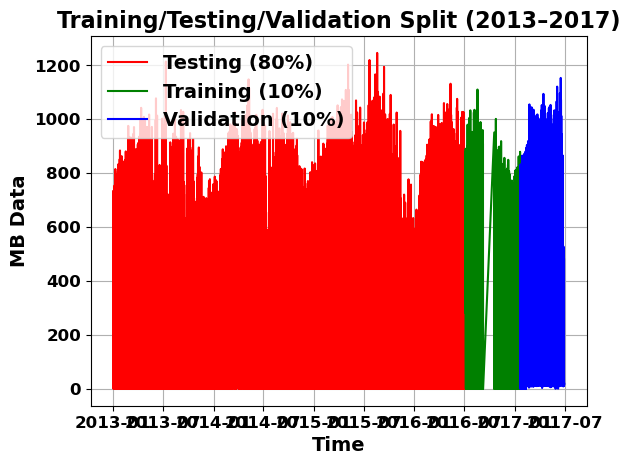

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Update this path to your actual file location
csv_file = r'E:\isccp_hgg_data\OMNI_BD10_Irradiance.csv'

# Load CSV with datetime parsing
data = pd.read_csv(csv_file, parse_dates=['DateTime'], date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S'))

# Filter time range
start_date = pd.Timestamp('2013-01-01')
end_date = pd.Timestamp('2017-06-30')
data = data[(data['DateTime'] >= start_date) & (data['DateTime'] <= end_date)]

# Calculate split indices
n = len(data)
idx_80 = int(0.8 * n)
idx_90 = int(0.9 * n)

# Split data
testing_data = data.iloc[:idx_80]
training_data = data.iloc[idx_80:idx_90]
validation_data = data.iloc[idx_90:]

# Plotting
plt.figure()
plt.plot(testing_data['DateTime'], testing_data['MB Data'], color=(1, 0, 0), label='Testing (80%)')         # Red
plt.plot(training_data['DateTime'], training_data['MB Data'], color=(0, 0.5, 0), label='Training (10%)')     # Dark Green
plt.plot(validation_data['DateTime'], validation_data['MB Data'], color=(0, 0, 1), label='Validation (10%)') # Blue

plt.xlabel('Time')
plt.ylabel('MB Data')
plt.title('Training/Testing/Validation Split (2013–2017)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
Calculating RMSE, MAE, R values to all the models; regression plot the best model


=== Bagging ===
Training MAE: 30.5594
Training RMSE: 71.0526
Training R: 0.9703
Testing MAE: 69.2495
Testing RMSE: 142.8906
Testing R: 0.8706


C:\Users\manda\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\manda\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


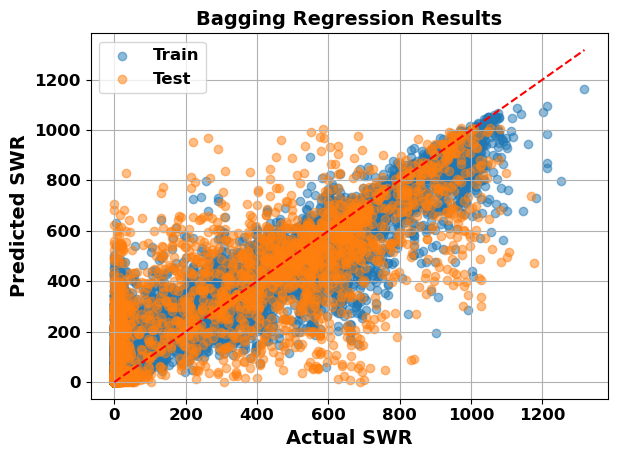


=== SVM ===
Training MAE: 102.1217
Training RMSE: 185.1430
Training R: 0.7987
Testing MAE: 101.5281
Testing RMSE: 184.6536
Testing R: 0.7915


C:\Users\manda\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\manda\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\manda\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\manda\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_err


=== Neural Network ===
Training MAE: 96.5099
Training RMSE: 162.5149
Training R: 0.8304
Testing MAE: 95.7471
Testing RMSE: 162.3753
Testing R: 0.8273

=== LSBoost ===
Training MAE: 67.5942
Training RMSE: 122.8348
Training R: 0.9077
Testing MAE: 71.9679
Testing RMSE: 130.6343
Testing R: 0.8923

=== Linear Regression ===
Training MAE: 126.4442
Training RMSE: 183.6462
Training R: 0.7769
Testing MAE: 125.4130
Testing RMSE: 183.5211
Testing R: 0.7727


C:\Users\manda\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\manda\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\manda\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\manda\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

In [12]:
###### import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import BaggingRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# === Load data ===
TO = pd.read_csv(r'E:\isccp_hgg_data\OmniBD10_3hrs_training.csv')
TR = pd.read_csv(r'E:\isccp_hgg_data\SWR_Jan2013-Jun2017_with_Mu0.csv')

# === datetime columns ===
dtOD = pd.to_datetime(dict(year=TO.Year, month=TO.Month, day=TO.Day, hour=TO.Hour))
dtR = pd.to_datetime(dict(year=TR.Year, month=TR.Month, day=TR.Day, hour=TR.Hour))

# === Feature engineering for TR ===
doyR = dtR.dt.dayofyear
TR['SinDay'] = np.sin(2 * np.pi * doyR / 365)
TR['CosDay'] = np.cos(2 * np.pi * doyR / 365)
TR['SinMonth'] = np.sin(2 * np.pi * (TR.Month - 1) / 12)
TR['CosMonth'] = np.cos(2 * np.pi * (TR.Month - 1) / 12)
TR['SinHour'] = np.sin(2 * np.pi * TR.Hour / 24)
TR['CosHour'] = np.cos(2 * np.pi * TR.Hour / 24)

# === Feature engineering for TO ===
doyO = dtOD.dt.dayofyear
TO['SinDay'] = np.sin(2 * np.pi * doyO / 365)
TO['CosDay'] = np.cos(2 * np.pi * doyO / 365)
TO['SinMonth'] = np.sin(2 * np.pi * (TO.Month - 1) / 12)
TO['CosMonth'] = np.cos(2 * np.pi * (TO.Month - 1) / 12)
TO['SinHour'] = np.sin(2 * np.pi * TO.Hour / 24)
TO['CosHour'] = np.cos(2 * np.pi * TO.Hour / 24)

# === Combine datasets ===
TRO = pd.concat([TR, TO], ignore_index=True)
yRO = TRO['SWR'].values
XRO = TRO.drop(columns=['SWR'])

# Replace NaN in Mu0 with -1 before imputation (if Mu0 exists)
if 'Mu0' in XRO.columns:
    XRO['Mu0'] = XRO['Mu0'].fillna(-1)

# Remove rows where yRO is NaN
not_nan_idx = ~np.isnan(yRO)
XRO = XRO.loc[not_nan_idx]
yRO = yRO[not_nan_idx]

# === Impute missing values in features with -1 ===
imputer = SimpleImputer(strategy='constant', fill_value=-1)
X_imputed = imputer.fit_transform(XRO)

# === Normalize features ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# === Train/test split ===
Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled, yRO, test_size=0.2, random_state=42)

# === Evaluate function ===
def evaluateModel(name, ytrain, ypred_train, ytest, ypred_test, plot=False):
    print(f'\n=== {name} ===')
    print(f'Training MAE: {mean_absolute_error(ytrain, ypred_train):.4f}')
    print(f'Training RMSE: {mean_squared_error(ytrain, ypred_train, squared=False):.4f}')
    print(f'Training R: {np.corrcoef(ytrain, ypred_train)[0,1]:.4f}')
    print(f'Testing MAE: {mean_absolute_error(ytest, ypred_test):.4f}')
    print(f'Testing RMSE: {mean_squared_error(ytest, ypred_test, squared=False):.4f}')
    print(f'Testing R: {np.corrcoef(ytest, ypred_test)[0,1]:.4f}')

    if plot:
        plt.figure()
        plt.scatter(ytrain, ypred_train, label='Train', alpha=0.5)
        plt.scatter(ytest, ypred_test, label='Test', alpha=0.5)
        plt.xlabel('Actual SWR', fontsize=14, fontweight='bold')
        plt.ylabel('Predicted SWR', fontsize=14, fontweight='bold')
        plt.title(f'{name} Regression Results', fontsize=14, fontweight='bold')
        plt.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'r--')
        plt.xticks(fontsize=12, fontweight='bold')
        plt.yticks(fontsize=12, fontweight='bold')
        plt.legend(fontsize=12)
        plt.grid(True)
        plt.tight_layout()
        plt.savefig('Bagging_model_train_test.png', dpi=300)
        plt.show()

# === 1. Bagging ===
model_bag = BaggingRegressor(random_state=42)
model_bag.fit(Xtrain, ytrain)
ypred_train_bag = model_bag.predict(Xtrain)
ypred_test_bag = model_bag.predict(Xtest)
evaluateModel('Bagging', ytrain, ypred_train_bag, ytest, ypred_test_bag, plot=True)

# === 2. SVM ===
model_svm = SVR()
model_svm.fit(Xtrain, ytrain)
ypred_train_svm = model_svm.predict(Xtrain)
ypred_test_svm = model_svm.predict(Xtest)
evaluateModel('SVM', ytrain, ypred_train_svm, ytest, ypred_test_svm, plot=False)

# === 3. Neural Network ===
model_nn = MLPRegressor(hidden_layer_sizes=(10,), random_state=42, max_iter=1000)
model_nn.fit(Xtrain, ytrain)
ypred_train_nn = model_nn.predict(Xtrain)
ypred_test_nn = model_nn.predict(Xtest)
evaluateModel('Neural Network', ytrain, ypred_train_nn, ytest, ypred_test_nn, plot=False)

# === 4. LSBoost (HistGradientBoostingRegressor) ===
model_lsboost = HistGradientBoostingRegressor(random_state=42)
model_lsboost.fit(Xtrain, ytrain)
ypred_train_lsboost = model_lsboost.predict(Xtrain)
ypred_test_lsboost = model_lsboost.predict(Xtest)
evaluateModel('LSBoost', ytrain, ypred_train_lsboost, ytest, ypred_test_lsboost, plot=False)

# === 5. Linear Regression ===
model_lr = LinearRegression()
model_lr.fit(Xtrain, ytrain)
ypred_train_lr = model_lr.predict(Xtrain)
ypred_test_lr = model_lr.predict(Xtest)
evaluateModel('Linear Regression', ytrain, ypred_train_lr, ytest, ypred_test_lr, plot=False)




In [13]:
TO["Unnamed: 7"] = TR["Unnamed: 7"];
TO["Unnamed: 8"] = TR["Unnamed: 8"];
TO["Unnamed: 9"] = TR["Unnamed: 9"];
TO["Unnamed: 10"] = TR["Unnamed: 10"];
TO["Unnamed: 11"] = TR["Unnamed: 11"];

In [14]:
yO = TO['SWR'].values
XO = TO.drop(columns=['SWR'])

# Replace NaN in Mu0 with -1 before imputation (if Mu0 exists)
if 'Mu0' in XO.columns:
    XO['Mu0'] = XO['Mu0'].fillna(-1)

# Remove rows where yRO is NaN
#not_nan_idx = ~np.isnan(yO)
#XO = XO.loc[not_nan_idx]
#yO = yO[not_nan_idx]

# === Impute missing values in features with -1 ===
imputer = SimpleImputer(strategy='constant', fill_value=-1)
X_imputedO = imputer.fit_transform(XO)

# === Normalize features ===
scaler = StandardScaler()
X_scaledO = scaler.fit_transform(X_imputedO)

In [15]:
ypred_train_bag_fullO = model_bag.predict(X_scaledO)


In [ ]:
Predicted over observed bagging model

C:\Users\manda\AppData\Local\Temp\ipykernel_24768\1425812444.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates_sample = pd.date_range(start='2016-09-01 00:00:00', periods=len(indices), freq='3H')


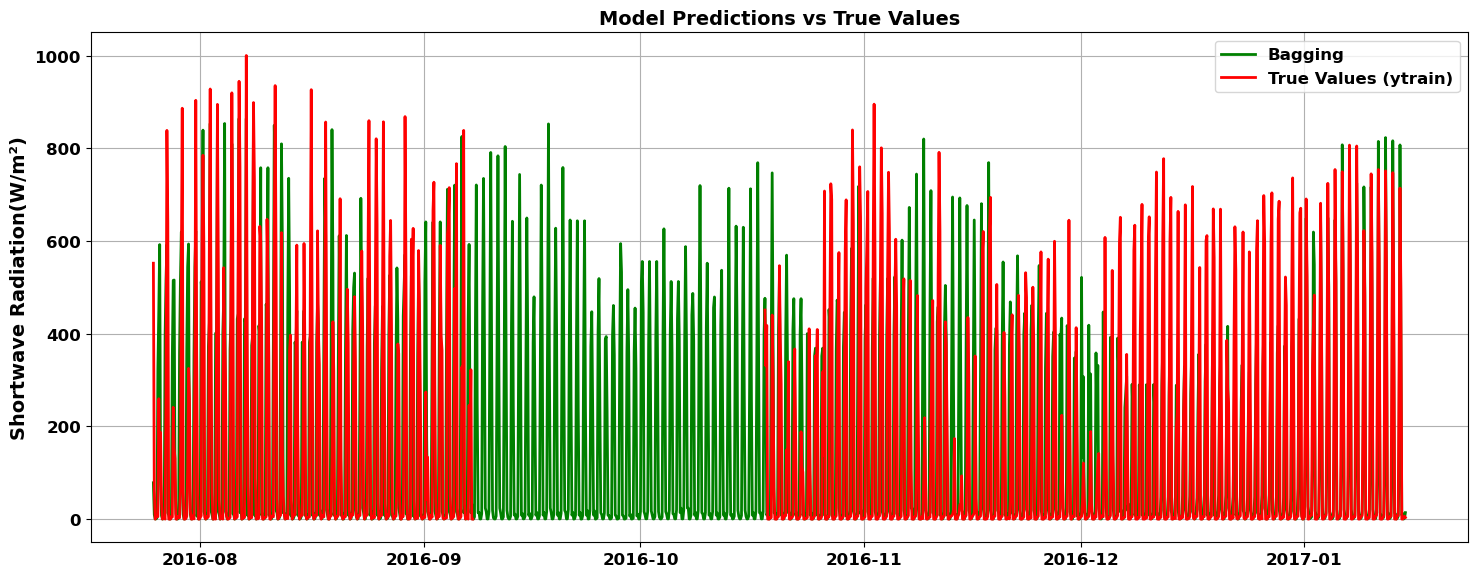

In [22]:
start_idx = 10412
end_idx = 11800  # inclusive
indices = np.arange(start_idx, end_idx + 1)  # Total: 2920

# Generate date range from 2017-01-01 with 3-hour frequency
dates_sample = pd.date_range(start='2016-09-01 00:00:00', periods=len(indices), freq='3H')

plt.figure(figsize=(15, 6))
plt.plot(dtOD[indices],ypred_train_bag_fullO[indices], label='Bagging', linewidth=2,color='green')
plt.plot(dtOD[indices],yO[indices], label='True Values (ytrain)', linewidth=2, color='red')
plt.title('Model Predictions vs True Values', fontsize=14, fontweight='bold')

plt.ylabel('Shortwave Radiation(W/m²)', fontsize=14, fontweight='bold')
# Tick labels bold
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Legend styling
plt.legend(fontsize=12)

plt.grid(True)
plt.tight_layout()
plt.savefig('Display_gaps_model_predictions_vs_true_values.png', dpi=300)
plt.show()


In [ ]:
Predicted over observed all models

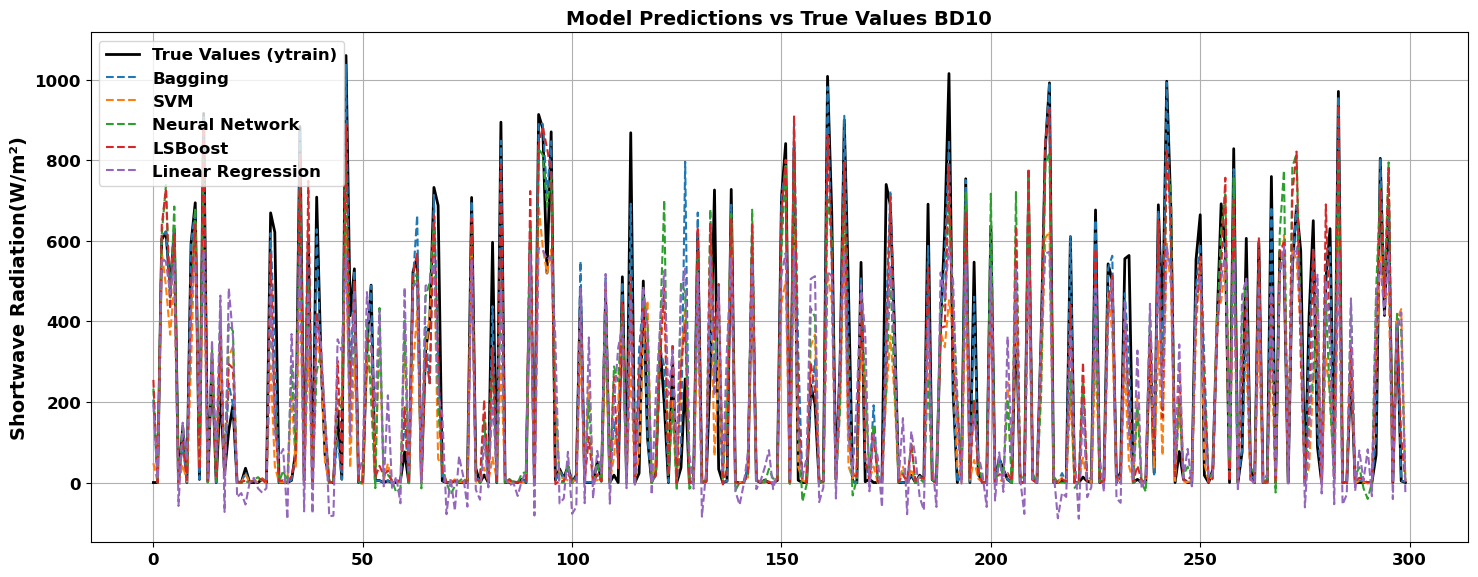

In [17]:
import matplotlib.pyplot as plt

# Plot a subset for better visualization (e.g., first 100 points)
#n = len(ytrain)

# Get 1000 random indices
#random_indices = np.random.choice(n, size=100, replace=False)


#plt.figure(figsize=(15, 6))
#plt.plot(ytrain[random_indices], label='True Values (ytrain)', linewidth=2, color='black')
#plt.plot(ypred_train_bag_full[random_indices], label='Bagging',linestyle='--')
#plt.plot(ypred_train_svm[random_indices], label='SVM', linestyle='--')
#plt.plot(ypred_train_nn[random_indices], label='Neural Network', linestyle='--')
#plt.plot(ypred_train_lsboost[random_indices], label='LSBoost', linestyle='--')
#plt.plot(ypred_train_lr[random_indices], label='Linear Regression', linestyle='--')

n = 300
plt.figure(figsize=(15, 6))
#plt.plot(ypred_train_bag_full[:n], label='Bagging', linewidth=1,color='blue')
#plt.plot(yRO[:n], label='True Values (ytrain)', linewidth=1, color='cyan')



plt.plot(ytrain[:n], label='True Values (ytrain)', linewidth=2, color='black')
plt.plot(ypred_train_bag[:n], label='Bagging', linestyle='--')
plt.plot(ypred_train_svm[:n], label='SVM', linestyle='--')
plt.plot(ypred_train_nn[:n], label='Neural Network', linestyle='--')
plt.plot(ypred_train_lsboost[:n], label='LSBoost', linestyle='--')
plt.plot(ypred_train_lr[:n], label='Linear Regression', linestyle='--')

plt.title('Model Predictions vs True Values BD10', fontsize=14, fontweight='bold')
plt.ylabel('Shortwave Radiation(W/m²)', fontsize=14, fontweight='bold')

# Tick labels bold
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Legend styling
plt.legend(fontsize=12)

plt.grid(True)
plt.tight_layout()
plt.savefig('All_model_predictions_vs_true_values.png', dpi=300)
plt.show()

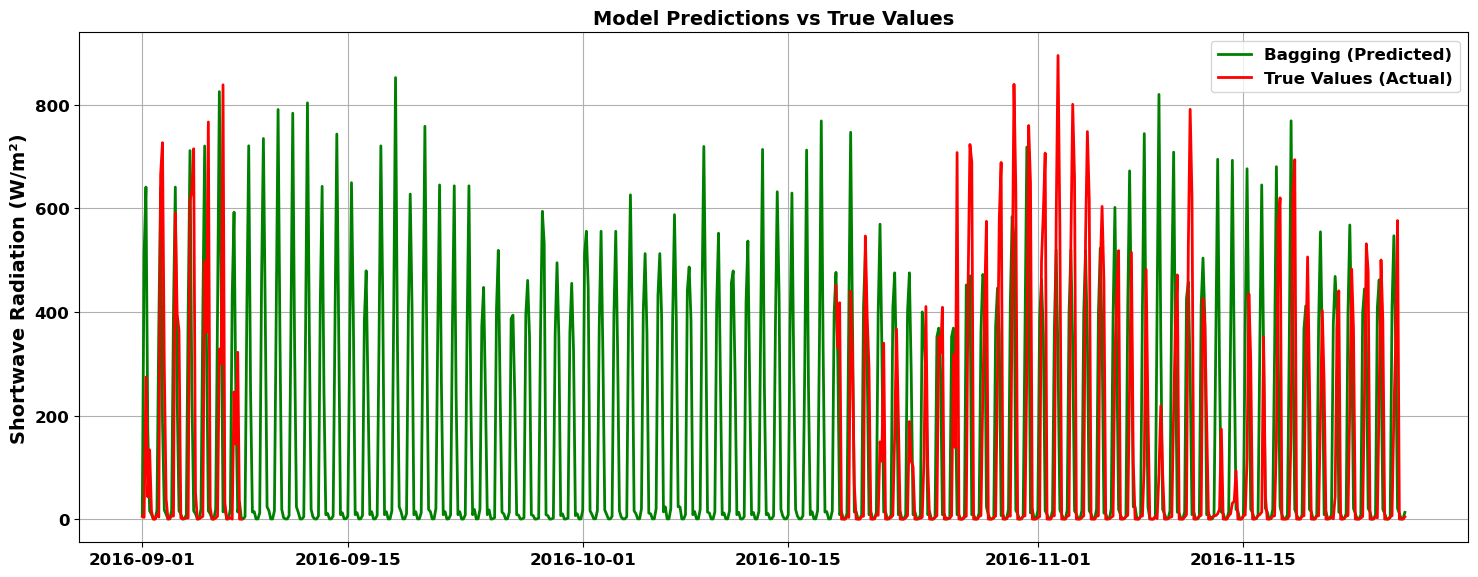

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Fixed start and end indices
start_idx = 10712
end_idx = 11400  # inclusive
indices = np.arange(start_idx, end_idx + 1)

# (Optional) Generate custom date range if needed — not used in plot below
# dates_sample = pd.date_range(start='2016-09-01 00:00:00', periods=len(indices), freq='3H')

# Extract values to plot
yRO_sample = yRO[indices]
ypred_sample = ypred_train_bag_fullO[indices]  # Using defined variable

# Plot
plt.figure(figsize=(15, 6))

# Plot predictions and actual values with datetime on x-axis
plt.plot(dtOD[indices], ypred_sample, label='Bagging (Predicted)', linewidth=2, color='green')
plt.plot(dtOD[indices], yO[indices], label='True Values (Actual)', linewidth=2, color='red')

# Labels, title, and formatting
plt.title('Model Predictions vs True Values', fontsize=14, fontweight='bold')
#plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Shortwave Radiation (W/m²)', fontsize=14, fontweight='bold')

# Ticks bold
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Legend and grid
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

# Save and display
plt.savefig('Bagging_model_predictions_vs_true_values.png', dpi=300)
plt.show()
